In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn


[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# load packages 
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [264]:
# Import the data
fname = "2022_Test_ML.csv"
fname = os.path.join('/media/igofed/SSD_2T/DATASETS/Huawei', fname)
df = pd.read_csv(fname, sep=',')

## 1.a Analyze data to understand the dataset quality and properties of the target functions

In [266]:
print("We have 4 features to predict two response variables")
print("Ranges of variations:")
print(f"s_mt \t[min: {np.min(df['s_mt'])}, max: {np.max(df['s_mt'])}]")
print(f"s_mq \t[min: {np.min(df['s_mq'])}, max: {np.max(df['s_mq'])}]")
print(f"d \t[min: {np.min(df['d'])}, max: {np.max(df['d'])}]")
print(f"h_p \t[min: {np.min(df['h_p'])}, max: {np.max(df['h_p'])}]")
#########################################
features=['ind', 's_mt', 's_mq', 'd', 'h_p', 'QW', 'DP']
R2, RMS = [], []
df.head(5)

We have 4 features to predict two response variables
Ranges of variations:
s_mt 	[min: 0.8, max: 2.7]
s_mq 	[min: 0.8, max: 2.1]
d 	[min: 1.0, max: 3.0]
h_p 	[min: 4.0, max: 10.0]


,ind,s_mt,s_mq,d,h_p,QW,DP
0,0,1.4092,1.9541,2.8677,7.8116,"1,504.1756",501.5630
1,1,1.3826,2.0062,1.5451,8.1242,"1,240.5305",377.1632
2,2,1.6224,1.3862,1.1924,7.3547,"1,385.1912",457.4048
3,3,1.7862,1.5920,2.3507,4.3246,"1,602.8420","1,429.7951"
4,4,1.9956,2.0244,1.2084,6.9940,"1,326.2910",514.0091


Unique numbers:  500
Unique numbers:  500
Unique numbers:  500


,s_mt,s_mq,d,h_p,QW,DP
s_mt,1.0000,0.0028,-0.0025,0.0021,-0.0182,-0.0059
s_mq,0.0028,1.0000,0.0033,0.0023,-0.0287,-0.0078
d,-0.0025,0.0033,1.0000,-0.0037,0.4491,0.1894
h_p,0.0021,0.0023,-0.0037,1.0000,-0.6327,-0.8980
QW,-0.0182,-0.0287,0.4491,-0.6327,1.0000,0.7433
DP,-0.0059,-0.0078,0.1894,-0.8980,0.7433,1.0000


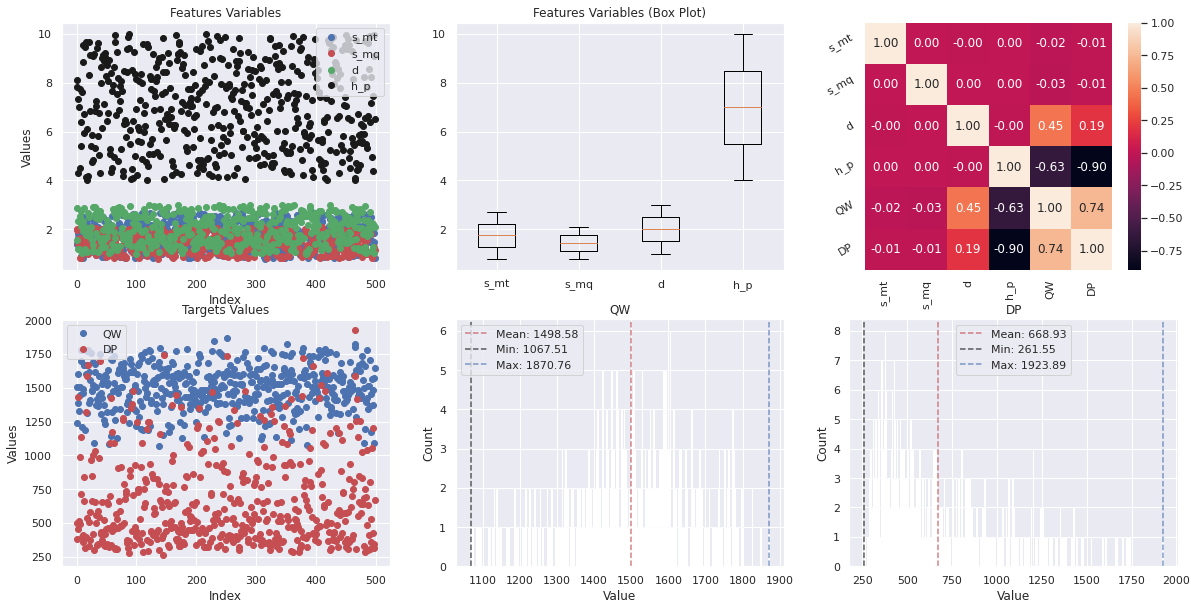

In [176]:
def plot_hist(ax, data, title):
    mu = np.round(np.mean(data),2)
    sigma = np.std(data)
    min = np.round(np.min(data),2)
    max = np.round(np.max(data),2)
    n, bins, _ = ax.hist(data, bins=500)
    #y = norm.pdf (bins, mu, sigma)
    #ax.plot (bins, y, 'r--')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    #ax.set_yscale('log')
    ax.set_title(title)
    ax.axvline(x=(np.mean(data)), ls="--", color='r', alpha=0.7,label='Mean: ' + np.str(mu))
    ax.axvline(x=(np.min(data)), ls="--", color='k', alpha=0.7, label='Min: ' + str(min))
    ax.axvline(x=float(np.max(data)), ls="--", color='b', alpha=0.7, label='Max: ' + str(max))
    ax.legend()
    sns.set()
# estimate correlation coefficients
def correlation_matrix(df):
    df = df.drop(features[0], axis=1)
    pd.options.display.float_format = '{:,.4f}'.format
    corr_matrix = df.corr()
    return corr_matrix

fig = plt.figure(figsize= (20, 10))
vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))

ax0 = fig.add_subplot(2,3, 1)
color = ["bo", "ro", 'go', "ko"]
for i in range(4):
    ax0.plot(df[features[0]], df[features[i+1]], color[i], label=features[i+1]) 
#ax0.plot(Y, X[:,1], "ro", label=f's_mq')                                     # plot data
#ax0.plot(Y, X[:,2], "go", label=f'd')                                     # plot data
#ax0.plot(Y, X[:,3], "ko", label=f'h_p')                                     # plot data
ax0.set_title('Features Variables')
ax0.legend()

plt.xlabel("Index", fontsize=12)                  # set x axis label
plt.ylabel("Values", fontsize=12)                  # set x axis label

ax1 = fig.add_subplot(2, 3, 2)
ax1.boxplot([df[features[1]], df[features[2]], df[features[3]], df[features[4]]], labels=features[1:5])
ax1.set_title('Features Variables (Box Plot)')

ax2 = fig.add_subplot(2, 3, 3)
corr_matrix = correlation_matrix(df)
#corr_matrix['QW'].sort_values(ascending=False)
a=sns.heatmap(corr_matrix,ax=ax2, square=True, annot=True, fmt='.2f', linecolor='white')          
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           


ax3 = fig.add_subplot(2, 3, 4)
for i in range(2):
    ax3.plot(df[features[0]], df[features[i+5]], color[i], label=features[i+5]) 
ax3.set_title('Targets Values')    
plt.xlabel("Index", fontsize=12)                  # set x axis label
plt.ylabel("Values", fontsize=12)                  # set x axis label

ax3.legend()

ax4 = fig.add_subplot(2, 3, 5)
plot_hist(ax4, df[features[-2]], title=features[-2])
ax5 = fig.add_subplot(2, 3, 6)
plot_hist(ax5, df[features[-1]], title=features[-1])

#corr_matrix(ax5, df.drop(features[0], axis=1))

#ax1 = fig.add_subplot(2,2, 3)
#ax1.plot(data[:,6], X[:,0], "bo", label=f's_mt')                                     # plot data
#ax1.plot(data[:,6], X[:,1], "ro", label=f's_mq')                                     # plot data
#ax1.plot(data[:,6], X[:,2], "go", label=f'd')                                     # plot data
#ax1.plot(data[:,6], X[:,3], "ko", label=f'h_p')                                     # plot data
#ax1.legend()
#plt.xlabel("X", fontsize=14)                  # set x axis label
#plt.ylabel("DP", fontsize=14)                  # set x axis label
#ax3 = fig.add_subplot(2,2, 4)
#plot_hist(ax3, X[:,0], "s_mt")
#plot_hist(ax3, X[:,1], "s_mq")
#plot_hist(ax3, X[:,2], "d")
#plot_hist(ax3, X[:,3], "h_p")

#ax3.hist(X[:,0], density=1,linewidth=2.0, histtype='step')
##ax3.hist(X[:,1], density=1,linewidth=2.0, histtype='step')
#ax3.hist(X[:,2], density=1,linewidth=2.0, histtype='step')
#ax3.hist(X[:,3], density=1,linewidth=2.0, histtype='step')
print('Unique numbers: ', len(df['s_mt'].unique()))
print('Unique numbers: ', len(df['s_mq'].unique()))
print('Unique numbers: ', len(df['d'].unique()))
# The correlation coefficient ranges from -1 to +1.
# When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between QW and DP and d.
# When it is clsoe to -1, it means that there is a strong negative correlation. 
corr_matrix

In [177]:
# Missing parameters
df.isnull().sum()


ind     0
s_mt    0
s_mq    0
d       0
h_p     0
QW      0
DP      0
dtype: int64

In [178]:
# Some statistics
df[features[1:]].describe()

,s_mt,s_mq,d,h_p,QW,DP
count,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000
mean,1.7500,1.4500,2.0000,7.0000,"1,498.5790",668.9275
std,0.5501,0.3764,0.5791,1.7373,163.2931,337.4723
min,0.8000,0.8000,1.0000,4.0000,"1,067.5051",261.5543
25%,1.2750,1.1250,1.5000,5.5000,"1,398.4530",410.9317
50%,1.7500,1.4500,2.0000,7.0000,"1,506.1747",554.7835
75%,2.2250,1.7750,2.5000,8.5000,"1,605.1636",845.1370
max,2.7000,2.1000,3.0000,10.0000,"1,870.7578","1,923.8863"


# 1.d. Choosing the model for target Function
Here's a step by step explanation:

1 $X = df[s\_mt, s\_mq, d, h\_p]$ Save 4 input features <br/>
 $y =  df[QW, DP]$ Save 2 targets

I will analyse 2 basic model:
1. Linear Regression which is not really suitable for h_p, But, we will see the error and use it just to ordinary workhorse start and compare. 
Intuitivle Linear Regression can fit more or less normally s_mt, s_mq and d, but it will fail with h_p. 
 Becouse h_p introduces maximum error in the result targets.
1. Nonlinear Regression.
1.

In [179]:
# Split source dataset into X and y categories. {Just for test}
X_df_origin = df.drop(features[5:], axis=1).drop(features[0], axis=1)
y_df_origin = df.drop(features[:5], axis=1)

1.d.1. Linear Regression

Each target is dependant on 4 variables:

$QW = s\_mt * w00 + s\_mq * w01 + d * w02 + h\_p * w03$

$DP = s\_mt * w10 + s\_mq * w11 + d * w12 + h\_p * w13$

1.d.2. Polinomial Regression

1.d.3. Decision Tree Regression

# Preprocessing data Z = (x-mu)/sigma

In [242]:

def lin_regression(X, y):
    #instantiate a model
    regression= LinearRegression()
    # train a model
    model = regression.fit(X, y)
    return model
df_train, df_test = train_test_split(df, test_size=0.20, random_state = 0)
df_train, df_test = df_train[features], df_test[features]
X_train, y_train = df_train.drop(features[5:], axis=1).drop(features[0], axis=1), df_train.drop(features[:5], axis=1)
X_test, y_test = df_test.drop(features[5:], axis=1).drop(features[0], axis=1), df_test.drop(features[:5], axis=1)

R2= []
RMS = []
#print ('Coefficients: ', lin_model.coef_)
#y_pred = lin_model.predict(X_test)
r2 =[]
rms = []

number_points = [100, 150, 200, 250, 300, 350, 400]
for i, num in enumerate(number_points):
    lin_model = lin_regression(X=X_train[0:num], y=y_train[0:num])
    y_pred = lin_model.predict(X_test)
    r2.append(r2_score(y_test, y_pred))
    rms.append(np.sqrt(mean_squared_error(y_test, y_pred)))    
R2 = r2
RMS = rms    
print(f"R2 Score value: {r2}")    
print(f"RMS Score value: {rms}")


R2 Score value: [0.6958059904533097, 0.7081186408107707, 0.7159321575965513, 0.7129325643699352, 0.7102441596721321, 0.7130146414117405, 0.7137265533196908]
RMS Score value: [121.62584894634529, 119.95756765206492, 118.36977406769029, 119.23394952732798, 120.00075935554592, 119.40761642735654, 119.59729780756088]


In [243]:
poly= PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X_df_origin)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(poly_features, y_df_origin, test_size=0.5, random_state = 0)
r2 =[]
rms = []
for i, num in enumerate(number_points):
    poly_model = lin_regression(X=X_train_p[0:num], y=y_train_p[0:num])
    poly_y_pred = poly_model.predict(X_test_p)
    r2.append(r2_score(y_test_p, poly_y_pred))
    rms.append(np.sqrt(mean_squared_error(y_test_p, poly_y_pred)))

R2, RMS = np.vstack((R2,r2)), np.vstack((RMS,rms))
print(f"R2 Score value: {R2[1]}")    
print(f"RMS Score value: {RMS[1]}")        



R2 Score value: [0.75854474 0.76652187 0.78638633 0.78886706 0.78886706 0.78886706
 0.78886706]
RMS Score value: [87.22372497 86.8846023  83.86314404 83.83318033 83.83318033 83.83318033
 83.83318033]


In [244]:
def tree_regression(X, y):
    #instantiate a model
    regression= DecisionTreeRegressor()
    # train a model
    model = regression.fit(X, y)
    return model
df_train, df_test = train_test_split(df, test_size=0.5, random_state = 0)
df_train, df_test = df_train[features], df_test[features]
X_train, y_train = df_train.drop(features[5:], axis=1).drop(features[0], axis=1), df_train.drop(features[:5], axis=1)
X_test, y_test = df_test.drop(features[5:], axis=1).drop(features[0], axis=1), df_test.drop(features[:5], axis=1)
r2 =[]
rms = []
for i, num in enumerate(number_points):
    tree_model = tree_regression(X=X_train[0:num], y=y_train[0:num])
    tree_y_pred = tree_model.predict(X_test)
    r2.append(r2_score(y_test, tree_y_pred))
    rms.append(np.sqrt(mean_squared_error(y_test, tree_y_pred)))
R2, RMS = np.vstack((R2,r2)), np.vstack((RMS,rms))
print(f"R2 Score value: {R2[2]}")    
print(f"RMS Score value: {RMS[2]}")        


R2 Score value: [0.62963223 0.63815818 0.65925638 0.66331731 0.67464962 0.66905136
 0.66771589]
RMS Score value: [117.82183956 116.21633953 114.94775594 114.09811036 111.45578088
 112.74297399 112.4635957 ]


In [245]:
from sklearn.ensemble import RandomForestRegressor
def forest_regression(X, y):
    #instantiate a model
    regression= RandomForestRegressor(max_depth=16)
    # train a model
    model = regression.fit(X, y)
    return model
df_train, df_test = train_test_split(df, test_size=0.5, random_state = 0)
df_train, df_test = df_train[features], df_test[features]
X_train, y_train = df_train.drop(features[5:], axis=1).drop(features[0], axis=1), df_train.drop(features[:5], axis=1)
X_test, y_test = df_test.drop(features[5:], axis=1).drop(features[0], axis=1), df_test.drop(features[:5], axis=1)
r2 =[]
rms = []
for i, num in enumerate(number_points):
    forest_model = forest_regression(X=X_train[0:num], y=y_train[0:num])
    forest_y_pred = forest_model.predict(X_test)
    r2.append(r2_score(y_test, forest_y_pred))
    rms.append(np.sqrt(mean_squared_error(y_test, forest_y_pred)))
R2, RMS = np.vstack((R2,r2)), np.vstack((RMS,rms))
print(f"R2 Score value: {R2[3]}")    
print(f"RMS Score value: {RMS[3]}")        


R2 Score value: [0.77505446 0.79131438 0.81257294 0.81053141 0.81494635 0.81650933
 0.81039223]
RMS Score value: [91.85420145 88.69391851 84.85083291 85.19715662 84.10760685 84.14281532
 85.99813786]


0.8165093274151388

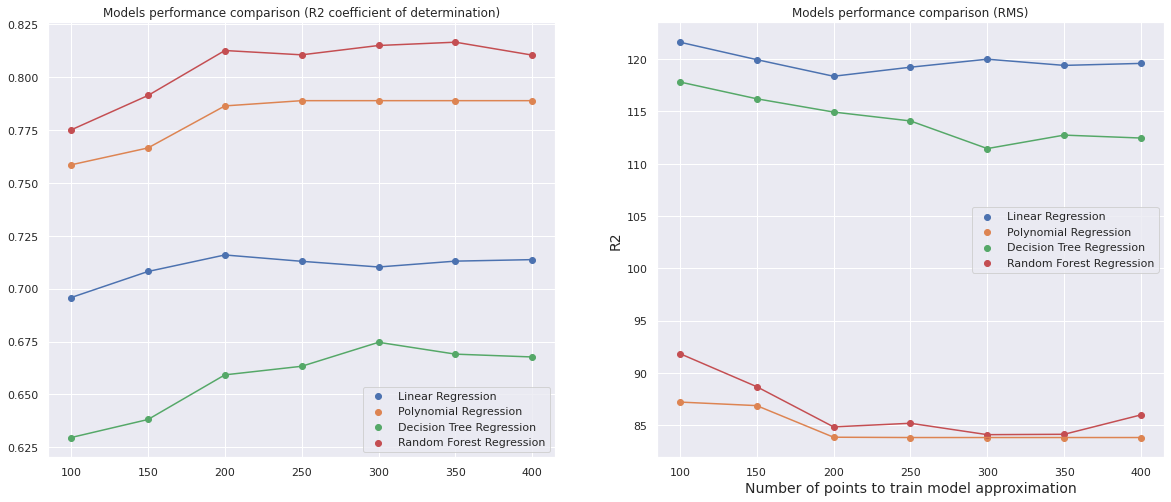

In [259]:
fig = plt.figure(figsize= (20, 8))
bar_width =1
ax0, ax1 = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)
ax0.set_title('Models performance comparison (R2 coefficient of determination)')
ax1.set_title('Models performance comparison (RMS)')
label = ['Linear Regression', 'Polynomial Regression', 'Decision Tree Regression', 'Random Forest Regression']
for i in range(4):
    ax0.scatter(number_points, R2[i], label=label[i])
    ax0.plot(number_points, R2[i])
    ax1.scatter(number_points, RMS[i], label=label[i])
    ax1.plot(number_points, RMS[i])

ax0.legend()
ax1.legend()
plt.xlabel("Number of points to train model approximation", fontsize=14)                  # set x axis label
plt.ylabel("R2", fontsize=14)                  # set x axis label
np.max(R2)
#ax0.bar(np.arange(1), r2[0], bar_width, alpha=0.8, label='Linear Regression')
#ax0.bar(np.arange(1)+bar_width, r2[1], bar_width, alpha=0.8,  label='Polynomial Regression')
#ax0.bar(np.arange(1)+bar_width*2, r2[2], bar_width, alpha=0.8,  label='Decision Tree Regression')
#ax0.bar(np.arange(1)+bar_width*3, r2[3], bar_width, alpha=0.8,  label='Random Forest Regression')
#ax0.legend()
#ax1 = fig.add_subplot(1,2,2)
#ax1.set_title('Models performance comparison')
#ax1.bar(np.arange(1), rms[0], bar_width, alpha=0.8, label='Linear Regression')
#ax1.bar(np.arange(1)+bar_width, rms[1], bar_width, alpha=0.8,  label='Polynomial Regression')
#ax1.bar(np.arange(1)+bar_width*2, rms[2], bar_width, alpha=0.8,  label='Decision Tree Regression')
#ax1.bar(np.arange(1)+bar_width*3, rms[3], bar_width, alpha=0.8,  label='Random Forest Regression')
#ax1.legend()
#r2, rms

In [ ]:

# Split source data to test and train (use 80% for training model)
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 0)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop(features[5:], axis=1).drop(features[0], axis=1), df_train.drop(features[:5], axis=1)
X_test, y_test = df_test.drop(features[5:], axis=1).drop(features[0], axis=1), df_test.drop(features[:5], axis=1)
print(f"Train-set shape: \tInput Features: {X_train.shape}, Output Labels: {y_train.shape}")
print(f"Test-set  shape: \tInput Features: {X_test.shape}, Output Labels: {y_test.shape}")

In [ ]:
# Feature Scaling - I use the StandardScaler from sklearn

# import the StandardScaler class from preprocessing library
from sklearn.preprocessing import StandardScaler
# instantiate an object scaler
scaler = StandardScaler()
# standardization 
#X_train = scaler.fit_transform(X_train)
# transform the test set
#X_test = scaler.transform(X_test)
#X_df_origin = scaler.transform(X_df_origin)
X_df_origin = np.asanyarray(X_df_origin)
y_df_origin = np.asanyarray(y_df_origin)

X_df_origin.shape, y_df_origin.shape

In [ ]:
#fit the linear regression model
#import the LinearRegression class from linear_model library
from sklearn.linear_model import LinearRegression

#instantiate a model
regression= LinearRegression()
# train a model
model = regression.fit(X_df_origin, y_df_origin)
print ('Coefficients: ', model.coef_)
y_pred = model.predict(X_df_origin)
# R2
r2 = model.score(X_df_origin, y_df_origin)
QW = y_pred[:,0]
# Multiple linear regression with 4 parameters
print("Residual sum of squares: %.2f"% np.mean((y_pred - y_df_origin) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regression.score(X_df_origin, y_df_origin))

In [ ]:
# Test


In [263]:
#print("Number of coefficients:", lr.coef_.shape)
##print("Estimated coefficients 0: {}".format(lr.coef_[0]))
#print("Estimated coefficients 1: {}".format(lr.coef_[1]))

# 1.c. Assess the approximation and generalization errors of the obtained model. 
# Use the coefficient of determination (R2) for the error metrics

$R^{2}= 1-RSS/TSS$ 

https://www.scribbr.com/statistics/coefficient-of-determination/

In [ ]:
from sklearn.metrics import r2_score 
print("R2 Score value: {:.2f}".format(r2_score(y_df_origin, y_pred)))
# 0.72 is good, but it is not perfect to deploy on unseen data.

In [ ]:
# lets check overfitting 

print("Training set score: {:.2f}".format(lr.score(X_df_origin, y_df_origin)))

In [ ]:


# plotting the Q-Q plot

import pylab 
import scipy.stats as stats


for var in features[1:]:
    
    plt.figure(figsize=(15,6))

    plt.subplot(1, 2, 1)
    df[var].hist()
    plt.title('Distribution of '+ var)

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.title('Q-Q plot of '+ var)

    plt.show() 



In [ ]:
################################################ Train #############################################
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)
#print("Predicted ERP - estimated relative performance for the first five values")



In [ ]:
#import sys
#!{sys.executable} -m pip install rfpimp
import rfpimp
############################### Permutation feature importance #####################################

imp = rfpimp.importances(rf, X_test, y_test)
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
plt.gca().invert_yaxis()

fig.tight_layout()


In [ ]:
df.head(10)
#print(df.shape)
#df['QW'].value_counts()
#df['DP'].value_counts()
#fig = plt.figure(figsize= (30, 15))
#ax0 = fig.add_subplot(4,1, 1)
#df['ind'].plot.hist(title ='int')
#df['s_mt'].plot.hist(title ='int')
#df.plot.hist(title = '1')
#df.describe()
#df.isnull().any()
print("Number of rows with 0 values for each variables")

#fig = plt.figure(figsize= (30, 15))
#for i in range(df.shape[1]-1):
    #ax = fig.add_subplot(4,2, i+1)
    #ax.plot(df['ind'], df.iloc[:,i+1])
    #ax.plot(df.plot.hist(title = '1'))
    #plt.plot(df['ind'], df['s_mt'])
#plt.show(

In [ ]:
df.head(10)

In [ ]:
data = np.loadtxt(fname, dtype=np.float32, delimiter=",", skiprows=1)
print(f'Data shape {data.shape}') # data shape (500, 7)
X = np.column_stack((data[:,1], data[:,2], data[:,3], data[:,4]))
Y = data[:,5]
Y = Y.reshape(-1, 1) 
print(f'X shape {X.shape}') # X shape (500, 4)
print(X[:2])
print(f'Y shape {Y.shape}') # Y shape (500, 1)
w = np.zeros((X.shape[1],1))
print(w.shape)

In [ ]:
def plot_hist(ax, data, title):
    mu = np.round(np.mean(data),2)
    sigma = np.std(data)
    min = np.round(np.min(data),2)
    max = np.round(np.max(data),2)
    n, bins, _ = ax.hist(data, bins=1024)
    #y = norm.pdf (bins, mu, sigma)
    #ax.plot (bins, y, 'r--')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    #ax.set_yscale('log')
    ax.set_title(title)
    ax.axvline(x=(np.mean(data)), ls="--", color='r', alpha=0.7,label='Mean: ' + np.str(mu))
    ax.axvline(x=(np.min(data)), ls="--", color='k', alpha=0.7, label='Min: ' + str(min))
    ax.axvline(x=float(np.max(data)), ls="--", color='b', alpha=0.7, label='Max: ' + str(max))
    ax.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
sea.set()
fig = plt.figure(figsize= (30, 15))
ax0 = fig.add_subplot(2,2, 1)
ax0.plot(Y, X[:,0], "bo", label=f's_mt')                                     # plot data
ax0.plot(Y, X[:,1], "ro", label=f's_mq')                                     # plot data
ax0.plot(Y, X[:,2], "go", label=f'd')                                     # plot data
ax0.plot(Y, X[:,3], "ko", label=f'h_p')                                     # plot data
ax0.legend()

plt.xlabel("X", fontsize=14)                  # set x axis label
plt.ylabel("QW", fontsize=14)                  # set x axis label

ax2 = fig.add_subplot(2, 2, 2)
bp = ax2.boxplot([X[:,0], X[:,1], X[:,2], X[:,3]], labels=['s_mt', 's_mq', 'd', 'h_p'])


ax1 = fig.add_subplot(2,2, 3)
ax1.plot(data[:,6], X[:,0], "bo", label=f's_mt')                                     # plot data
ax1.plot(data[:,6], X[:,1], "ro", label=f's_mq')                                     # plot data
ax1.plot(data[:,6], X[:,2], "go", label=f'd')                                     # plot data
ax1.plot(data[:,6], X[:,3], "ko", label=f'h_p')                                     # plot data
ax1.legend()
plt.xlabel("X", fontsize=14)                  # set x axis label
plt.ylabel("DP", fontsize=14)                  # set x axis label
ax3 = fig.add_subplot(2,2, 4)
plot_hist(ax3, X[:,0], "s_mt")
plot_hist(ax3, X[:,1], "s_mq")
plot_hist(ax3, X[:,2], "d")
plot_hist(ax3, X[:,3], "h_p")

#ax3.hist(X[:,0], density=1,linewidth=2.0, histtype='step')
##ax3.hist(X[:,1], density=1,linewidth=2.0, histtype='step')
#ax3.hist(X[:,2], density=1,linewidth=2.0, histtype='step')
#ax3.hist(X[:,3], density=1,linewidth=2.0, histtype='step')


# Linear Regression Model

In [ ]:
# Simple Regression Model
# Weight sum of the inputs with multiple variables
#y1 = s_mt + w00 + s_mq * w01 + d * w02 + h_p * w03 
#y2 = s_mt + w10 + s_mq * w11 + d * w12 + h_p * w13 
# Initialize weights
def predict(X, w):
    '''
    y = x*w 
    y = [x1, x2, x3, x4] x [w1, w2, w3, w4]^{-1} 
    matrix (500, 4) multyply on vector (500, 1)
    Args:   X - Entire array of numbers
            w - weight
    Out:    Predicted value
    '''
    return np.matmul(X,w)

def loss(X, Y, w):
    '''
    averaged squared error = (predict(X,w) - Y)^2
    Args:   X - Entire array of numbers
            w - weight
            Y - Ground True Values
            b - bias
    Out:    Predicted value
    '''
    return np.average((predict(X, w)-Y)**2)

def gradient(X, Y, w):
    
    w_gradient = 2 * np.matmul(X.T * (predict(X, w) - Y))/X.shape[0]
    #b_gradient = 2 * np.average(predict(X, w, b) - Y)
    #return (w_gradient, b_gradient)
    return w_gradient

## Train

In [ ]:
def train(X, Y, epochs, lr): 
    '''
    Args:   X - Entire array of numbers
            Y - Ground True Values
            epochs - number of iteration
            lr - learning rate
    Out:    weights
    '''
    w = np.zeros((X.shape[1], 1))
    for i in range(epochs):
        if (i%2000==0 or i==9999):
            print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        # each calculation starts by calculating the current loss
        w = w - gradient(X, Y, w) * lr
    return w
      
    #raise Exception("Couldn't converge within %d iterations" % epochs)

def test(X, Y, w):
    total_examples = X.shape[0]
    correct_results = np.sum(classify(X, w) == Y)
    success_percent = correct_results * 100 / total_examples
    print("\nSuccess: %d/%d (%.2f%%)" %
          (correct_results, total_examples, success_percent))

In [ ]:
w = train(X, Y, epochs=25000, lr = 0.01)
print("\nWeights: %s" % w.T)
print("\nA few predictions:")
#test(X, Y, w)

#for i in range(len(X[:,0])):
#    print("X[%d] -> %.4f (label: %d)" % (i, predict(X[i], w), Y[i]))


In [ ]:
y = []
for i in range(len(X[:,0])):
    y.append(predict(X[i], w))
fig = plt.figure(figsize= (30, 15))
ax0 = fig.add_subplot(1,1, 1)
delta = Y-y
ax0.plot(delta, "bo", label=f'QW')                                     # plot data
#ax0.plot(y, "ro", label=f'QW1')                                     # plot data
plt.show()


In [ ]:
import numpy as np

# computing the predictions
def predict(X, w):
    return np.matmul(X, w)

def sigmoid(z):
    '''
    Sigmoid - S shape function 
    sigma(Z) = 1/(1+exp^{-z})
    When Z is 0 sigmoid return 
    '''
# calculating the loss
def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)

# evaluating the gradient
def gradient(X, Y, w):
    return 2 * np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]

# performing the training phase for our classifier
def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w

# loading the data first and then training the classifier for 50,000 iteration
x1, x2, x3, y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)
X = np.column_stack((x1, x2, x3))
Y = y.reshape(-1, 1)
print(X.shape)
print(Y.shape)
#w = train(X, Y, iterations=50000, lr=0.001)

In [ ]:
print("\nw=%.3f" % w)
# Predict the number of pizzas
print("Prediction: x=%d => y=%.2f" % (1.5, predict(1.995591, w)))
fig = plt.figure(figsize= (30, 15))
ax0 = fig.add_subplot(2,1, 1)
ax0.plot(data[:,1], data[:,5], "bo", label=f's_mt')
ax0.plot(data[:,1], data[:,1]*w, "bo", label=f'linear regression')

In [ ]:
def train(X, Y, epochs, lr): 
    '''
    Args:   X - Entire array of numbers
            Y - Ground True Values
            epochs - number of iteration
            lr - learning rate
    Out:    weights
    '''
    w = 0 #  unlikely to be a good approximation, but just to start
    b = 0
    for i in range(epochs):
        current_loss = loss(X, Y, w, b)
        if i % 300==0: 
            print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        # each calculation starts by calculating the current loss
        if loss(X, Y, w + lr, b) < current_loss: 
            w = w + lr
            
        elif loss(X, Y, w - lr,b) < current_loss: 
            w = w - lr
        elif loss(X, Y, w, b + lr) < current_loss: 
            b = b + lr
        elif loss(X, Y, w,b - lr ) < current_loss: 
            b = b - lr
        
        else:
            return w, b
      
    raise Exception("Couldn't converge within %d iterations" % epochs)
w, b = train(data[:,1], data[:,5], epochs=500000, lr = 0.01)
print("\nw=%.3f, b=%.3f" % (w, b))

In [ ]:
# Predict the number of pizzas
print("Prediction: x=%d => y=%.2f" % (1.5, predict(1.995591, w, b)))
fig = plt.figure(figsize= (30, 15))
ax0 = fig.add_subplot(2,1, 1)
ax0.plot(data[:,1], data[:,5], "bo", label=f's_mt')
ax0.plot(data[:,1], data[:,1]*w+b, "bo", label=f'linear regression')

Gradient Descent

In [ ]:
def train(X, Y, epochs, lr): 
    '''
    Args:   X - Entire array of numbers
            Y - Ground True Values
            epochs - number of iteration
            lr - learning rate
    Out:    weights
    '''
    w = 0 #  unlikely to be a good approximation, but just to start
    b = 0
    for i in range(epochs):
        
        if i % 300==0: 
            print("Iteration %4d => Loss: %.6f" % (i, loss(X, Y, w, b)))

        # each calculation starts by calculating the current loss
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w = w - w_gradient * lr
        b = b - b_gradient * lr
        
        return w, b
    
w, b = train(data[:,1], data[:,5], epochs=500000, lr = 0.01)
print("\nw=%.3f, b=%.3f" % (w, b))


In [ ]:
df.hist()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(2, 4, figsize= (30, 15))